# Image Classfication Demo

## Load sample files, prepare the configurations

In [2]:
import json
import numpy
from keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import requests


scoring_uri = "http://6b3d2db1-075a-411b-b9ca-10f047140122.westus.azurecontainer.io/score"
# scoring_uri = 'http://40.78.151.237:80/api/v1/service/mlops-aks/score'

headers = {'Content-Type': 'application/json'}
# headers = {'Content-Type': 'application/json',
#            'Authorization':
#            ('Bearer ' + '3shRck4Fhh4B1HuZLBBKhQQWcplFX4IB')}


## Predict the sample files

In [3]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
from utils import load_data

n = 10
data_folder = "..\data"
X_test_path = glob.glob(
    os.path.join(
        data_folder,
        '**/t10k-images-idx3-ubyte.gz'),
    recursive=True)[0]
y_test_path = glob.glob(
        os.path.join(
            data_folder,
            '**/t10k-labels-idx1-ubyte.gz'),
        recursive=True)[0]

X_test = load_data(X_test_path, False) / 255.0
y_test = load_data(y_test_path, True).reshape(-1)
sample_indices = np.random.permutation(X_test.shape[0])[0:n]

print(X_test[sample_indices].shape)
js_data = json.dumps({"data": X_test[sample_indices].tolist()})
# js_data = json.dumps({"data": np.ones([2, 784]).tolist()})

resp = requests.post(scoring_uri, js_data, headers=headers)

print("POST to url", scoring_uri)
print("prediction:", resp.text)

(10, 784)
POST to url http://6b3d2db1-075a-411b-b9ca-10f047140122.westus.azurecontainer.io/score
prediction: {"result": [6, 5, 8, 4, 5, 3, 8, 2, 0, 7]}


## Show all of the prediction results

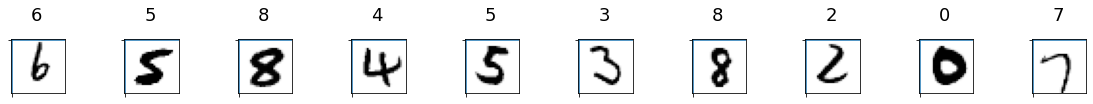

In [4]:
# compare actual value vs. the predicted values:
i = 0
plt.figure(figsize = (20, 1))
result = (json.loads(resp.text)['result'])

for s in sample_indices:
    plt.subplot(1, n, i + 1)
    plt.axhline('')
    plt.axvline('')
    
    # use different color for misclassified sample
    font_color = 'red' if y_test[s] != result[i] else 'black'
    clr_map = plt.cm.gray if y_test[s] != result[i] else plt.cm.Greys
    
    plt.text(x=10, y=-10, s=result[i], fontsize=18, color=font_color)
    plt.imshow(X_test[s].reshape(28, 28), cmap=clr_map)
    
    i = i + 1
plt.show()